# Université Paul Sabatier

EMIND1G1 - Fondements de la recherche d'information

**TP 1**

Enseignant : José G. Moreno

2020

TP 1. Indexation d’un corpus des documents textes avec PyTerrier (version python de Terrier)

Étapes à suivre pendant ce TP :
1. Installation de l’environnement de travail
2. Collecte du corpus de documents
3. Analyses et exploration du code pour l’indexation et la recherche
4. Reconfiguration de l’indexation
5. Questions ouvertes


L'indexation de documents est une tâche très importante pour la recherche d'information. Dans ce TP, nous allons utiliser Terrier (http://terrier.org/) pour faire l'indexation de documents

## 1. Installation de l’environnement de travail

L'installation d'un framework comme terrier peut être un peu compliqué. Cependant, ses créteurs ont décidé de simplifier plusieurs de tâches dans l'installation. Pour cela, nous allons faire une installation simple à l'aide de pip sur python.

In [5]:
# déclaration de la variable JAVA_HOME
import os
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-11-openjdk-amd64' #Les librairies ont été faites en java pour la recherche d'informations */ 
!export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64

In [6]:
#installation de pyterrier avec pip
!pip install --upgrade git+https://github.com/terrier-org/pyterrier.git#egg=python-terrier

  Cloning https://github.com/terrier-org/pyterrier.git to /tmp/pip-install-gqg027_w/python-terrier
  Running command git clone -q https://github.com/terrier-org/pyterrier.git /tmp/pip-install-gqg027_w/python-terrier
Processing /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f/wget-3.2-cp36-none-any.whl
Processing /root/.cache/pip/wheels/55/66/40/1779aa0a8eb66e088669befe286f695cdfe420ba91ce662127/pytrec_eval-0.5-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d8/50/098cb5fb76fb7c7d99d403226a2a63dcbfb5c129b71b7d0f5200b05de1f0/pyjnius-1.3.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/cc/49/7a16d5f15b02ae106cc2220b3d755ec10ef328e0dcf3a1702f659bea945d/matchpy-0.5.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/c3/253a89ee03fc9b9682f1541728eb66db7db22148cd94f89ab22528cd1e1b/deprecation-2.1.0-py2.py3-none-any.whl
Processing /root/.cache/pip/wheels/f9

In [7]:
#Initialization de JVM
import pyterrier as pt
if not pt.started():
  pt.init()

terrier-assemblies 5.3  jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.4  jar not found, downloading to /root/.pyterrier...
Done


In [8]:
#Création du dossier pour le stockage des indexes
import pandas as pd
!rm -rf ./pd_index
pd_indexer = pt.DFIndexer("./pd_index")

## 2. Collecte du corpus de documents
Le concept théorique a été vu en cours : diapositives 12 et 22
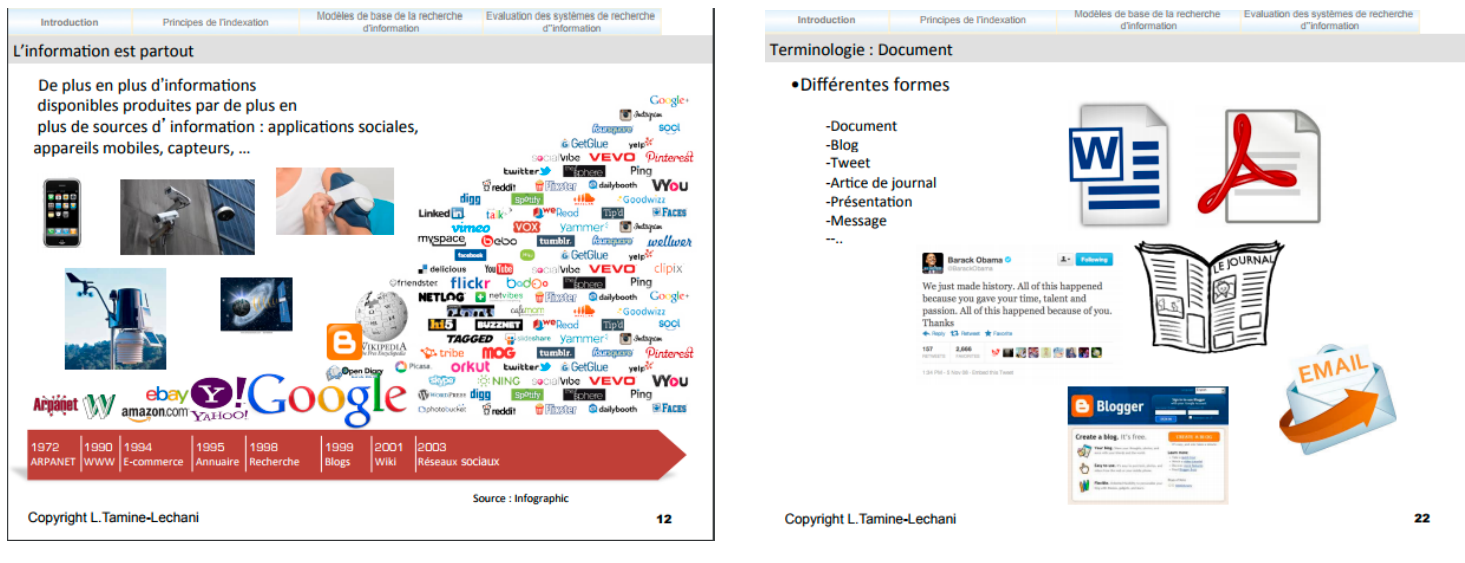

 

Maintenant nous allons télécharger un corpus des documents textes. Notez que cette étape est dépendante du corpus qu'on souhaite utiliser. 

Pour ce TP nous utiliserons la [Wikipédia simple](https://simple.wikipedia.org) en anglais disponible en format XML sur un site dédié par l'organisation Wikimedia.

In [9]:
!wget https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-abstract.xml.gz

--2020-10-30 09:52:09--  https://dumps.wikimedia.org/simplewiki/20200901/simplewiki-20200901-abstract.xml.gz
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15445414 (15M) [application/octet-stream]
Saving to: ‘simplewiki-20200901-abstract.xml.gz’

simplewiki-20200901 100%[===================>]  14.73M  4.96MB/s    in 3.0s    

2020-10-30 09:52:12 (4.96 MB/s) - ‘simplewiki-20200901-abstract.xml.gz’ saved [15445414/15445414]



In [10]:
!gzip -d simplewiki-20200901-abstract.xml.gz #Décompresse le fichier 

## 3. Lecture et pré-traitement des fichiers
Pour lire la version de Wikipédia en format XML nous utiliserons la librairie XML de python. Voici un code exemple pour lire le fichier XML et le transformer dans un dataframe de pandas.

La function parse_XML permet de lire un fichier XML et retourner un dataframe

In [11]:
import pandas as pd
import xml.etree.ElementTree as et

def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        for el in df_cols[0:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [12]:
!head -50 simplewiki-20200901-abstract.xml

<feed>
<doc>
<title>Wikipedia: April</title>
<url>https://simple.wikipedia.org/wiki/April</url>
<abstract>April is the fourth month of the year, and comes between March and May. It is one of four months to have 30 days.</abstract>
<links>
<sublink linktype="nav"><anchor>The Month</anchor><link>https://simple.wikipedia.org/wiki/April#The_Month</link></sublink>
<sublink linktype="nav"><anchor>April in poetry</anchor><link>https://simple.wikipedia.org/wiki/April#April_in_poetry</link></sublink>
<sublink linktype="nav"><anchor>Events in April</anchor><link>https://simple.wikipedia.org/wiki/April#Events_in_April</link></sublink>
<sublink linktype="nav"><anchor>Fixed Events</anchor><link>https://simple.wikipedia.org/wiki/April#Fixed_Events</link></sublink>
<sublink linktype="nav"><anchor>Moveable Events</anchor><link>https://simple.wikipedia.org/wiki/April#Moveable_Events</link></sublink>
<sublink linktype="nav"><anchor>Selection of Historical Events</anchor><link>https://simple.wikipedia.or

In [13]:
df = parse_XML("simplewiki-20200901-abstract.xml", ["title", "url", "abstract"])
df["docno"]=[str(i+1) for i in range(len(df))]
df


,title,url,abstract,docno
0,Wikipedia: April,https://simple.wikipedia.org/wiki/April,"April is the fourth month of the year, and com...",1
1,Wikipedia: August,https://simple.wikipedia.org/wiki/August,August (Aug.) is the eighth month of the year ...,2
2,Wikipedia: Art,https://simple.wikipedia.org/wiki/Art,Category:Non-verbal communication,3
3,Wikipedia: A,https://simple.wikipedia.org/wiki/A,A or a is the first letter of the English alph...,4
4,Wikipedia: Air,https://simple.wikipedia.org/wiki/Air,thumb|A [is used to move air.],5
...,...,...,...,...
171492,Wikipedia: American comic book,https://simple.wikipedia.org/wiki/American_com...,An American comic book is a thin book in the U...,171493
171493,"Wikipedia: Calistoga, California","https://simple.wikipedia.org/wiki/Calistoga,_C...",|subdivision_type = Country,171494
171494,Wikipedia: Global citizenship,https://simple.wikipedia.org/wiki/Global_citiz...,Global citizenship is the idea that everyone i...,171495
171495,Wikipedia: Sidney Jellicoe,https://simple.wikipedia.org/wiki/Sidney_Jellicoe,Sidney Jellicoe (25 August 1906 – 24 November ...,171496


## 4. Indexation du dataframe
Voici un code exemple pour indexer les résumés (abstract) de chaque page Wikipédia comme un document. La tâche semble trivial, cependant la librarie Terrier fait la plus part du travail.

In [14]:
indexResume = pd_indexer.index(df["abstract"], df["docno"], df["url"], df["title"]) 

09:52:20.098 [main] WARN  o.t.structures.indexing.Indexer - Adding an empty document to the index (29) - further warnings are suppressed
09:53:57.374 [main] WARN  o.t.structures.indexing.Indexer - Indexed 2883 empty documents


In [16]:
#statistiques de l'index
index = pt.IndexFactory.of(indexResume)
print(index.getCollectionStatistics().toString())

Number of documents: 171497
Number of terms: 111780
Number of fields: 0
Number of tokens: 1744613
Field names: []
Positions:   false



Notez que le dossier pn_index/ n'est plus vide

## 5 Exécution d’une recherche avec la requête "France"

Voici le code pour exécuter une requête en utilisant le modèle TF-IDF

In [18]:
pt.BatchRetrieve(indexResume, wmodel="TF_IDF", metadata=["docno","title","url"]).transform("france")

,qid,docid,docno,title,url,rank,score,query
0,1,5984,5985,Wikipedia: Runion,https://simple.wikipedia.org/wiki/R%C3%A9union,0,4.406187,france
1,1,65064,65065,Wikipedia: Siberian Intervention,https://simple.wikipedia.org/wiki/Siberian_Int...,1,4.253678,france
2,1,80726,80727,Wikipedia: Battle of Belgium,https://simple.wikipedia.org/wiki/Battle_of_Be...,2,4.253678,france
3,1,5429,5430,Wikipedia: American Revolutionary War,https://simple.wikipedia.org/wiki/American_Rev...,3,4.253678,france
4,1,98176,98177,Wikipedia: Battle of the Netherlands,https://simple.wikipedia.org/wiki/Battle_of_th...,4,4.253678,france
...,...,...,...,...,...,...,...,...
995,1,41210,41211,Wikipedia: Communes of the Pas-de-Calais depar...,https://simple.wikipedia.org/wiki/Communes_of_...,995,3.077227,france
996,1,132084,132085,Wikipedia: Ruederbach,https://simple.wikipedia.org/wiki/Ruederbach,996,3.077227,france
997,1,110389,110390,Wikipedia: Will McBride (photographer),https://simple.wikipedia.org/wiki/Will_McBride...,997,3.077227,france
998,1,70322,70323,Wikipedia: Communes of the Savoie department,https://simple.wikipedia.org/wiki/Communes_of_...,998,3.077227,france


D'autres modèles sont disponibles. Ils sont décrits ici 

http://terrier.org/docs/v4.0/configure_retrieval.html

In [20]:
pt.BatchRetrieve(indexResume, wmodel="DFR_BM25", metadata=["docno","title","url"]).transform("france")

,qid,docid,docno,title,url,rank,score,query
0,1,5984,5985,Wikipedia: Runion,https://simple.wikipedia.org/wiki/R%C3%A9union,0,3.602887,france
1,1,65064,65065,Wikipedia: Siberian Intervention,https://simple.wikipedia.org/wiki/Siberian_Int...,1,3.586959,france
2,1,80726,80727,Wikipedia: Battle of Belgium,https://simple.wikipedia.org/wiki/Battle_of_Be...,2,3.586959,france
3,1,5429,5430,Wikipedia: American Revolutionary War,https://simple.wikipedia.org/wiki/American_Rev...,3,3.586959,france
4,1,98176,98177,Wikipedia: Battle of the Netherlands,https://simple.wikipedia.org/wiki/Battle_of_th...,4,3.586959,france
...,...,...,...,...,...,...,...,...
995,1,25928,25929,"Wikipedia: Champis, Ardche","https://simple.wikipedia.org/wiki/Champis,_Ard...",995,2.503126,france
996,1,137110,137111,Wikipedia: Saint-Martin-du-Mont,https://simple.wikipedia.org/wiki/Saint-Martin...,996,2.503126,france
997,1,51621,51622,Wikipedia: Ligue 2,https://simple.wikipedia.org/wiki/Ligue_2,997,2.503126,france
998,1,87319,87320,"Wikipedia: Charmoy, Yonne","https://simple.wikipedia.org/wiki/Charmoy,_Yonne",998,2.503126,france


## 7 Lecture d'un index existant

Pour tester la lecture d'un index existant, utlisez le code suivant (n'oubliez pas sauvegarder le dossier de l'index avant redemarrer le notebook) 

In [21]:
indexResume = pt.autoclass("org.terrier.querying.IndexRef").of(os.path.join("/content/pd_index", "data.properties"))

In [24]:
pt.BatchRetrieve(indexResume, metadata=["docno", "title"]).transform("france")

,qid,docid,docno,title,rank,score,query
0,1,3643,3644,Wikipedia: Madeleine of France,0,3.410784,france
1,1,163432,163433,Wikipedia: Vietnamese Demilitarized Zone,1,3.367055,france
2,1,131592,131593,Wikipedia: Marie milie de Joly de Choin,2,3.365501,france
3,1,142890,142891,"Wikipedia: Louis Antoine, Duke of Angoulme",3,3.365501,france
4,1,134740,134741,Wikipedia: Frances Horwich,4,3.364145,france
...,...,...,...,...,...,...,...
995,1,40522,40523,Wikipedia: Bthancourt-en-Vaux,995,2.468339,france
996,1,40438,40439,Wikipedia: Barisis-aux-Bois,996,2.468339,france
997,1,38487,38488,Wikipedia: Arbigny,997,2.468339,france
998,1,40693,40694,Wikipedia: Froidmont-Cohartille,998,2.468339,france


## 8 Questions du TP



### 8.1 Inspention du code

**Inspectez le code et identifiez les classes et méthodes clés pour faire la lecture du fichier XML, l'indexation et l’exécution de la requête**


|                         | Classes | Méthodes |
|-------------------------|---------|----------|
| Lecture du XML          |    parse_XML    |    parse / append /     dataFrame    |
| Indéxation              |    pd_indexer   |     index    |
| Exécution de la requête |    pt    |     BatchRetrieve / transform    |






**Le concept théorique a été vu en cours : diapositive 34**


**Cherchez sur la documentation de lucene les différents Analyzers et identifiez leurs différences.
Pourquoi on a besoin de plusieurs Analyzers ? **

Ils sont différents sur différents points. Ils dépendent de la langue, du pays, des attentes (vouloir des synonymes, utiliser des fonctions d'analyses, etc...). Il y a des analyzers phonétique, avec des synonymes, morphologique, etc... 

On a besoin de plusieurs analyzers car on analyse pas de la même manière suivant les attentes. 


**Qu'est-ce que la classe TextField et à quoi serve-t-elle ? Pouvez vous utiliser une autre classe ?
Laquelle ?**

TextField permet à un utilisateur d'entrer une seule ligne sans formatage. Permet d'obtenir une action après la saisie de l'utilisateur. 
On peut utiliser une autre classe : 



### 8.2. Reconfiguration de l’indexation
Le concept théorique a été vu en cours : diapositive 20

**Modifiez le code pour indexer autres champs de chaque document. Par exemple la colonne** title **du dataframe**.  







In [26]:
!rm -rf ./pd_indexTitre
pd_indexerTitre = pt.DFIndexer("./pd_indexTitre") 
indexTitre = pd_indexerTitre.index(df["title"], df["docno"], df["url"], df["title"])  

In [29]:
pt.BatchRetrieve(indexTitre, metadata=["docno", "title"]).transform("france")

,qid,docid,docno,title,rank,score,query
0,1,84628,84629,Wikipedia: Unit de formation et de recherche m...,0,3.887799,france
1,1,65317,65318,"Wikipedia: Louis, Dauphin of France (son of Lo...",1,3.667144,france
2,1,65348,65349,"Wikipedia: Philippe, Duke of Orlans, Regent of...",2,3.667144,france
3,1,113761,113762,Wikipedia: France women's national football team,3,3.536407,france
4,1,18465,18466,Wikipedia: List of Tour de France winners,4,3.536407,france
...,...,...,...,...,...,...,...
173,1,9945,9946,"Wikipedia: Nancy, France",173,2.449753,france
174,1,25766,25767,Wikipedia: Cantons of France,174,2.449753,france
175,1,132848,132849,Wikipedia: Frances Sternhagen,175,2.449753,france
176,1,144077,144078,Wikipedia: Frances Farmer,176,2.449753,france


**Modifiez le code pour indexer plusieurs fichier texte dans un répertoire ou lieu d’un seul fichier XML comme le code le fait actuellement.** 

### 8.3 Questions ouvertes
**Renseignez vous sur Solr ou/et ElasticSearch et essayez de faire le même index.
Quelles différences identifiez-vous ?**

Solr est un index inversé (il inverse une structure de donnée centrée sur la page en une structure centrée sur les mots clés). Au lieu de chercher directement le texte, il cherche un index à la place. Solr prend des données structurées, semi-structurées et non structurées provenant de diverses sources, les stocke et les indexe, et les rend disponibles pour la recherche en temps quasi réel. Solr est également utilisé pour ses capacités analytiques, vous permettant d'effectuer une recherche de produits à facettes, l'agrégation d'événements de journaux / de sécurité, l'analyse des médias sociaux, etc.  

ElasticSearch est basé sur la bibliothèque lucène, est développé en Java. Il fournit un système distribué au dessus de Lucene. Elasticsearch prend les données non structurées de différents emplacements, les stocke et les indexe en fonction du mappage spécifié par l'utilisateur (qui peut également être dérivé automatiquement à partir des données) et les rend consultables. C'est un moteur de recherche en texte intégral, moteur analytique. Il utilise un index inversé. 

Solr est plus compétent pour les données statiques. 
ElasticSearch est plutôt adpaté à des contextes d'exploration de données structurées, en temps réel. 

**Pour Terrier, où sont les « fichiers d’indexation » mentionnés dans la diapositive 34 du cours ?
Pourquoi sont-ils nécessaires ?**

Ils sont dans un dossier pd_index. Ils sont nécessaires car ils permettent de stoker les indexs créés. 


C'est tout pour ce premier TP. 